In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


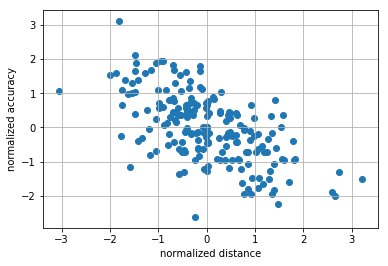

In [2]:
pga = pd.read_csv('pga.csv')

pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print pga.head()

plt.scatter(pga.distance,pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')

plt.grid()
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
print 'Shape of the series:',pga.distance.shape
print 'Shape with newaxis:',pga.distance[:,np.newaxis].shape

lm = LinearRegression()
lm.fit(pga.distance[:,np.newaxis],pga.accuracy)
theta1 = lm.coef_[0]
print theta1

 Shape of the series: (197,)
Shape with newaxis: (197, 1)
-0.607598822715


1.5994384226


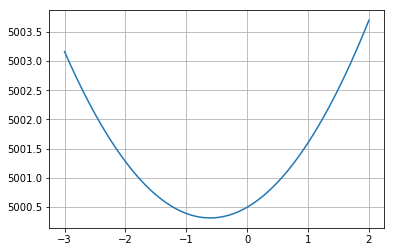

In [6]:
def cost(theta0,theta1,x,y):
    J = 0
    m = len(x)
    for i in range(m):
        h = theta1 * x[i] + theta0
        J += np.power(h - y[i],2)
    J /= (2 * m )
    return J

print cost(0,1,pga.distance,pga.accuracy)

theta0 = 100
theta1s = np.linspace(-3,2,100)
costs = []

for theta1 in theta1s:
    costs.append(cost(theta0,theta1,pga.distance,pga.accuracy))

plt.plot(theta1s,costs)
plt.grid()
plt.show()

        

In [7]:
from mpl_toolkits.mplot3d import Axes3D

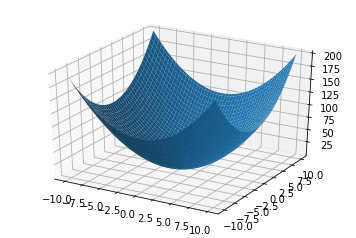

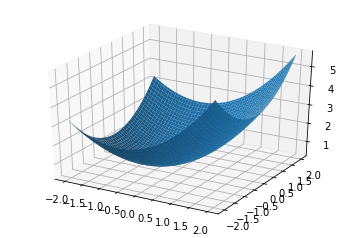

In [8]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x,y)

Z = X**2 + Y**2

fig = plt.figure()

ax = fig.gca(projection ='3d')

ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2,100)
COST = np.empty(shape=(100,100))
T0S,T1S = np.meshgrid(theta0s,theta1s)
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i],T1S[j,0],pga.distance,pga.accuracy)

fig2 = plt.figure()
ax = fig2.gca(projection = '3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)

plt.grid()
plt.show()

In [9]:
print X[:5,:5]
print '-------'
print Y[:5,:5]
print '-------'
print T0S[:5,:5]
print T1S[:5,:5]

[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]]
-------
[[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]
-------
[[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384]
 [-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384]
 [-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384]
 [-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384]
 [-2.         -1.95959596 -1.91919192 -1.87878788 

In [10]:
def partial_cost_theta1(theta0,theta1,x,y):
    h = theta0 + theta1 * x
    diff = (h - y) * x
    partial = diff.sum() / (x.shape[0])
    return partial

partital_1 = partial_cost_theta1(0,5,pga.distance,pga.accuracy)
print 'partital_1 = %.2f' % partital_1

def partial_cost_theta0(theta0,theta1,x,y):
    h = theta0 + theta1 * x
    diff = (h - y )
    partial = diff.sum() / (x.shape[0])
    return partial

partital_0 = partial_cost_theta0(1,1,pga.distance,pga.accuracy)
print 'partition_0 = %.2f' %partital_0

partital_1 = 5.58
partition_0 = 1.00


theta1 =  -0.604698316638


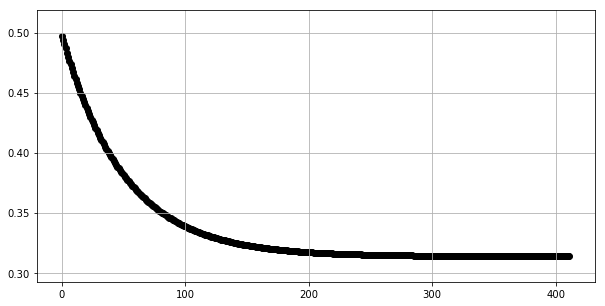

In [24]:
def gradient_descent(x,y,alpha=0.1,theta0=0,theta1=0):
    max_iterations = 1000
    counter = 0
    c = cost(theta0,theta1,pga.distance,pga.accuracy)
    costs = [c]
    
    convergence_thres = 0.000001
    cprev = c + 10 
    theta0s = [theta0]
    theta1s = [theta1]
    
    while (np.abs(cprev - c)>convergence_thres) and (counter<max_iterations):
        cprev = c
        update0 = alpha * partial_cost_theta0(theta0,theta1,x,y)
        update1 = alpha * partial_cost_theta1(theta0,theta1,x,y)
        
        theta0 -= update0
        theta1 -= update1
        
        c = cost(theta0,theta1,pga.distance,pga.accuracy)
        
        costs.append(c)
        counter += 1
    return {'theta0':theta0,"theta1":theta1,'costs':costs}

print 'theta1 = ',gradient_descent(pga.distance,pga.accuracy)['theta1']
descent = gradient_descent(pga.distance,pga.accuracy,alpha = 0.01)


fit = plt.figure(figsize=(10,5))
plt.scatter(range(len(descent['costs'])),descent['costs'],color='black',linewidths=1)
#plt.plot(range(len(descent['costs'])),descent['costs'],color='red')
plt.grid()
plt.show()